In [1]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


data = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
data.shape

(569, 33)

In [3]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
remove_columns = ['Unnamed: 32', 'id']
data.drop(columns=remove_columns, inplace=True) 

## train test split

In [5]:
x = data.drop(columns='diagnosis')
y = data['diagnosis']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## scaling 

In [7]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## label encoding

In [8]:
y.unique()

array(['M', 'B'], dtype=object)

In [9]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [10]:
y_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

## convert numpy arrays to tensors

In [16]:
x_train_tensor = torch.tensor(x_train)
x_test_tensor = torch.tensor(x_test)
y_train_tensor = torch.tensor(y_train)
y_test_tensor = torch.tensor(y_test)

In [17]:
print(x_train_tensor.shape)
print(x_train_tensor.dtype)
print(y_train_tensor.shape)

torch.Size([455, 30])
torch.float64
torch.Size([455])


## defining model arch

In [18]:
class SimpleNN:
    def __init__(self,x):
        self.weights = torch.randn(x.shape[1], 1, requires_grad=True, dtype=torch.float64)
        self.bias = torch.zeros(1, requires_grad=True, dtype=torch.float64)
    
    def forward(self, x):
        z = torch.matmul(x, self.weights) + self.bias
        y_pred = torch.sigmoid(z)
        return y_pred
    
    def loss(self, y_pred, y): ##Binary Cross-Entropy
        """This loss function measures how far the predicted probabilities y_pred are from the actual labels y for binary classification (0 or 1)."""
        epsilon = 1e-7
        y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon) ## y_pred is clamped to be between epsilon and 1 - epsilon to avoid taking the log of 0 or 1.
        
        loss = -(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred)).mean()
        return loss


In [19]:
lr = 0.1
epochs = 150

## training pipeline

differentiation path


        L (Loss)
          ^
          |
     dL/dy_pred
          ^
          |
     y_pred = sigmoid(z)
          ^
          |
     z = w * x + b
       ^      ^    ^
       |      |    |
     dw      dx   db


                dL/dy_pred
                     |
                     v
          d(sigmoid)/dz = dy_pred * (1 - dy_pred)
                     |
                     v
                 dz/dw = x
                 dz/db = 1
                     |
                     v
            dL/dw = dL/dz * x
            dL/db = dL/dz * 1


dL/dw ​= ​dL/dypred ​⋅ dypred/dz ​​⋅ dz​/dw 


dL/db ​= ​dL/dypred ​⋅ dypred/dz ​​⋅ dz​/db

In [20]:
model = SimpleNN(x_train_tensor)
n_samples = x_train_tensor.shape[0]
batch_size = 32

for epoch in range(epochs):
    for i in range(0, n_samples, batch_size):
    # Forward pass
        end = i + batch_size
        y_pred = model.forward(x_train_tensor[i:end])
        loss = model.loss(y_pred, y_train_tensor[i:end])
        
        # Backward pass
        loss.backward()

        # Update weights
        with torch.no_grad():
            model.weights -= lr * model.weights.grad
            model.bias -= lr * model.bias.grad

        # Zero gradients so that grad is not accumulated
        model.weights.grad.zero_()
        model.bias.grad.zero_()
    if epoch % 10 == 0:
        print(f"for {epoch} loss is {loss.item()}")

for 0 loss is 1.7698709214842607
for 10 loss is 0.672106103592883
for 20 loss is 0.6459578073145807
for 30 loss is 0.6343616844367279
for 40 loss is 0.627640084953213
for 50 loss is 0.6234464515055529
for 60 loss is 0.6206558540951538
for 70 loss is 0.6186973240832058
for 80 loss is 0.6172605197692044
for 90 loss is 0.6161663507629102
for 100 loss is 0.615306197722826
for 110 loss is 0.6146114050070746
for 120 loss is 0.6140370893059487
for 130 loss is 0.6135530909683866
for 140 loss is 0.6131386660966041


## evaluation metrics

In [21]:
with torch.no_grad():
    y_pred = model.forward(x_test_tensor)
    y_pred = (y_pred > 0.5).float()
    accuracy = (y_pred == y_test_tensor).float().mean()
    print(f"Accuracy: {accuracy.item()}")

Accuracy: 0.6206524968147278


### from scratch (using numpy only)

i have x_train and y_train, x_test and y_test from above and use that here

In [ ]:
class Oneneuron:
    def __init__(self,x):
        self.weights = np.random.randn(x.shape[1], 1)  ## shape is number of features
        self.bias = np.zeros(1)
    
    def forward_pass(self,x_train):
        z = np.dot(x_train, self.weights) + self.bias
        y_pred = 1 / (1 + np.exp(-z))
        return y_pred
    
    def loss(self, y_pred, y): ## Binary Cross-Entropy
        epsilon = 1e-7
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss
    
    def backward_pass(self, x_train, y_pred, y):
        ## Ensure all arrays are numpy arrays and have proper shape
        y = y.reshape(-1, 1)       ## shape (455, 1)
        y_pred = y_pred.reshape(-1, 1)

        ## Derivative of the loss w.r.t z
        dz = y_pred - y  # shape (455, 1)

        # Compute gradients
        dw = np.dot(x_train.T, dz) / x_train.shape[0]   ## shape (30, 1)
        db = np.mean(dz)                                ## scalar

        return dw, db

    def update_weights(self, dw, db, lr):
        self.weights -= lr * dw
        self.bias -= lr * db

for 0 loss is 1.8530100008756383
for 100 loss is 1.852294759066303
for 200 loss is 1.8515825778479988
for 300 loss is 1.8508734530075701
for 400 loss is 1.8501673803363192
for 500 loss is 1.849464355630022
for 600 loss is 1.848764374688896
for 700 loss is 1.8480674333173392
for 800 loss is 1.8473735273240992
for 900 loss is 1.8466826525219904
for 1000 loss is 1.8459948047277384
for 1100 loss is 1.8453099797619292
for 1200 loss is 1.8446281734492618
for 1300 loss is 1.8439493816178407
for 1400 loss is 1.8432736000994392
for 1500 loss is 1.842600824729515
for 1600 loss is 1.8419310513467493
for 1700 loss is 1.8412642757931705
for 1800 loss is 1.8406004939140648
for 1900 loss is 1.839939701557678


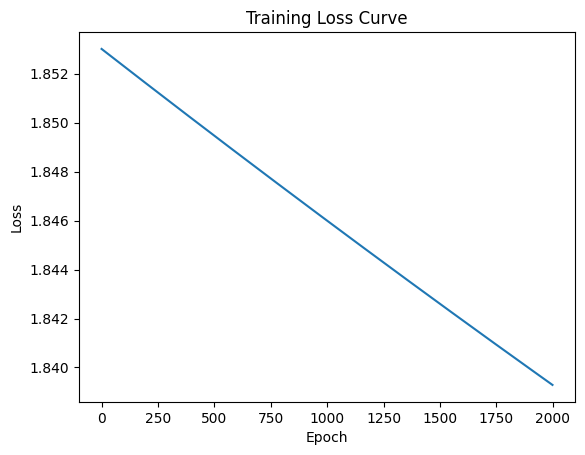

In [37]:
import matplotlib.pyplot as plt

model = Oneneuron(x_train)
epochs = 2000
lr = 0.00001

losses = []

for epoch in range(epochs):
    y_pred = model.forward_pass(x_train)
    loss = model.loss(y_pred, y_train)
    dw, db = model.backward_pass(x_train, y_pred, y_train)
    model.update_weights(dw, db, lr)
    losses.append(loss)
    if epoch % 100 == 0:
        print(f"for {epoch} loss is {loss}")

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()
